*Title: "Climate Resilience in Agricultural Production: A Time Series Analysis"*

*Introduction:*
Agricultural production is susceptible to the impacts of climate variability, posing significant challenges to food security and livelihoods worldwide. This project aims to analyze a real-world dataset spanning over a decade to understand the complex interactions between weather patterns, agricultural practices, and crop yields. By identifying key drivers of crop productivity and assessing climate resilience strategies, we aim to provide actionable insights for stakeholders to enhance sustainability and adaptability in agriculture.

*Objectives:*
1. *Identify Long-term Trends:* Analyze historical data to identify long-term trends and patterns in temperature, precipitation, and crop yields across different regions.
2. *Assess Seasonal Variability:* Explore seasonal variations in weather patterns and crop yields, considering factors such as planting and harvesting seasons.
3. *Evaluate Climate Impact:* Quantify the impact of weather variability on crop productivity, including the effects of extreme weather events such as droughts, floods, and heatwaves.
4. *Investigate Adaptation Strategies:* Assess the effectiveness of various adaptation strategies, including irrigation techniques, crop rotation, and pest management, in mitigating the adverse effects of climate change.
5. *Predict Future Scenarios:* Develop time series forecasting models to predict future crop yields under different climate scenarios, enabling stakeholders to anticipate and plan for future challenges.
6. *Recommend Policy Interventions:* Provide evidence-based recommendations to policymakers, agricultural organizations, and farmers for implementing sustainable practices and policies to enhance climate resilience in agriculture.

*Methodology:*
1. *Data Collection:* Gather a comprehensive dataset containing monthly observations of weather variables (temperature, precipitation), crop yields, soil moisture, pest infestation, agricultural practices, and market prices across multiple regions.
2. *Data Preprocessing:* Clean the data, handle missing values, outliers, and inconsistencies, and perform data normalization and feature engineering to prepare the dataset for analysis.
3. *Exploratory Data Analysis (EDA):* Conduct exploratory analysis to visualize trends, correlations, and seasonality in the data, gaining insights into the underlying patterns and relationships.
4. *Time Series Modeling:* Apply time series analysis techniques, including autoregressive integrated moving average (ARIMA), seasonal ARIMA (SARIMA), and long short-term memory (LSTM) networks, to model and forecast crop yields based on historical data.
5. *Statistical Analysis:* Use statistical tests to determine the significance of relationships between weather variables, agricultural practices, and crop yields, providing a robust understanding of the factors influencing agricultural productivity.
6. *Machine Learning:* Develop predictive models using machine learning algorithms such as random forest, gradient boosting, and neural networks to capture complex interactions and nonlinearities in the data, enhancing the accuracy of crop yield forecasts.
7. *Scenarioagriculture Analysis:* Explore different climate scenarios and assess their potential impact on future crop productivity, considering adaptive strategies and their implications for sustainable .

*Conclusion:*
Through a multidisciplinary analysis of real-world data, this project aims to enhance our understanding of the dynamics between climate variability and agricultural production. By leveraging advanced analytical techniques and stakeholder engagement, we seek to empower decision-makers with actionable insights for building climate-resilient agricultural systems and ensuring food security for future generations.

Data collection

In [80]:
import numpy as np
import pandas as pd
df=pd.read_excel('agricultural_data.xlsx')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        168 non-null    datetime64[ns]
 1   Region                      168 non-null    object        
 2   Temperature (°C)            160 non-null    float64       
 3   Precipitation (mm)          168 non-null    float64       
 4   Crop Yield (tons/hectare)   168 non-null    float64       
 5   Crop Price (currency/unit)  168 non-null    float64       
 6   Soil Moisture (%)           168 non-null    float64       
 7   Pest Infestation            168 non-null    object        
 8   Agricultural Practice       168 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 11.9+ KB


There are # categorical columns in the data set  Region, Pest Infestation  ,Agricultural Practice  

print first 5 rows

In [82]:
df.head()

,Date,Region,Temperature (°C),Precipitation (mm),Crop Yield (tons/hectare),Crop Price (currency/unit),Soil Moisture (%),Pest Infestation,Agricultural Practice
0,2010-01-01,Region C,14.473714,54.853832,2.553074,14.336918,21.970800,Low,Conventional
1,2010-01-02,Region A,10.223268,78.403145,1.917579,5.075344,74.764968,Low,Conventional
2,2010-01-03,Region C,12.926177,23.817290,2.063752,7.253328,34.893587,Low,Organic
3,2010-01-04,Region C,8.006296,65.282977,2.441380,8.653568,54.657917,High,Conventional
4,2010-01-05,Region A,13.279597,32.691716,2.039799,9.878098,29.930799,Medium,Organic


Find the missing values

In [83]:
df.isnull().sum()

Date                          0
Region                        0
Temperature (°C)              8
Precipitation (mm)            0
Crop Yield (tons/hectare)     0
Crop Price (currency/unit)    0
Soil Moisture (%)             0
Pest Infestation              0
Agricultural Practice         0
dtype: int64

There are 8 missing values in the Temperature (°C) columns

Fill the missing value with mean

Outliers detection

In [84]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

0


Box plot

<Axes: >

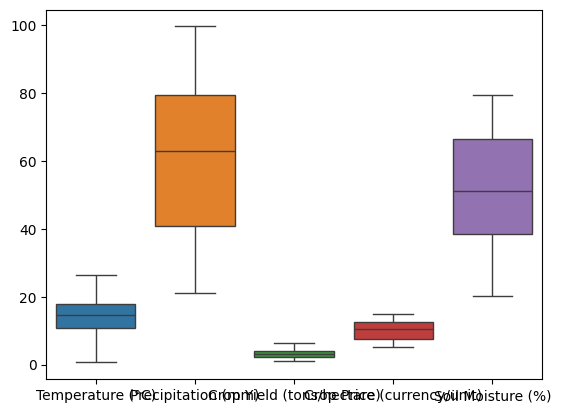

In [85]:
# Box Plot
import seaborn as sns
sns.boxplot(df)

In Temperature (°C) there are some outliers

Remove outliers

In [86]:
for x in ['Temperature (°C)']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

Fill the missing value with mean

In [87]:
df['Temperature (°C)'].fillna(int(df['Temperature (°C)'].mean()),inplace=True)

In [88]:
df.isnull().sum()

Date                          0
Region                        0
Temperature (°C)              0
Precipitation (mm)            0
Crop Yield (tons/hectare)     0
Crop Price (currency/unit)    0
Soil Moisture (%)             0
Pest Infestation              0
Agricultural Practice         0
dtype: int64

In [89]:
 df1=df.drop(['Date','Region','Pest Infestation','Agricultural Practice'],axis=1)

Correlation

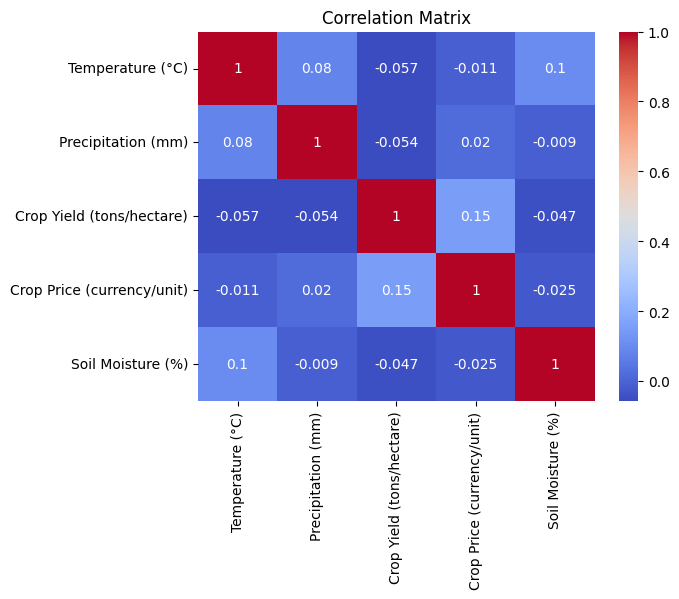

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plot the objects with respect to date

<Axes: xlabel='Date'>

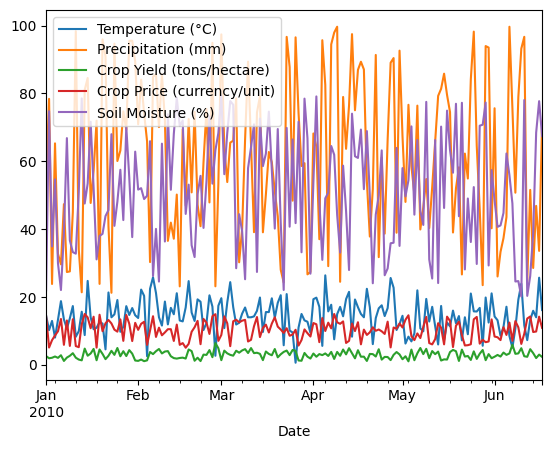

In [91]:
import pandas as pd 
import matplotlib
# casting Month column to Datetime object 
df['Date'] = df['Date'].apply(pd.to_datetime)
#df['Date'] = pd.to_Datetime(df['Date']) 
  
# Setting Month as index 
df = df.set_index('Date') 
  
# Creating the plot 
df.plot() 

What is the mean Crop Price (currency/unit) for each group (A, B, C)?

In [92]:
df.groupby('Region')['Crop Price (currency/unit)'].mean()

Region
Region A    10.220707
Region B    10.797556
Region C     9.694191
Name: Crop Price (currency/unit), dtype: float64

So ,Region B has the highest crop Price for each group

What is the mean Crop Yield (tons/hectare) for each group (A, B, C)

In [93]:
df.groupby('Region')['Crop Yield (tons/hectare)'].mean()

Region
Region A    3.025097
Region B    2.834710
Region C    3.035678
Name: Crop Yield (tons/hectare), dtype: float64

Region C  has highest Crop yield

Mean  Agricultural Practice Crop Price (currency/unit) for each group Conventional ,Organic

In [94]:
df.groupby('Agricultural Practice')['Crop Price (currency/unit)'].mean()

Agricultural Practice
Conventional     9.792619
Organic         10.585264
Name: Crop Price (currency/unit), dtype: float64

Organic Agricultural Practice which has highest value.

Mean  Agricultural Practice crop Yield (tons/hectare) for each group Conventional ,Organic

In [95]:
df.groupby('Agricultural Practice')['Crop Yield (tons/hectare)'].mean()

Agricultural Practice
Conventional    2.972108
Organic         2.970469
Name: Crop Yield (tons/hectare), dtype: float64

Pest Infestation 

In [96]:
df.groupby('Pest Infestation')['Crop Yield (tons/hectare)'].mean()

Pest Infestation
High      2.916109
Low       3.010006
Medium    2.873836
Name: Crop Yield (tons/hectare), dtype: float64

In [97]:
df.groupby('Pest Infestation')['Soil Moisture (%)'].mean()

Pest Infestation
High      44.630506
Low       52.963807
Medium    50.055177
Name: Soil Moisture (%), dtype: float64

In [98]:
df.groupby('Pest Infestation')['Temperature (°C)'].mean()

Pest Infestation
High      11.641695
Low       14.666460
Medium    15.686687
Name: Temperature (°C), dtype: float64

Where temerature is low and soil moisture is low there pest infaction cahmnce is high

Is there a significant difference Crop Price (currency/unit)in  between the different Region

In [99]:
from scipy.stats import f_oneway

# Perform ANOVA
result = f_oneway(df[df['Region'] == 'Region A']['Crop Price (currency/unit)'],
                  df[df['Region'] == 'Region B']['Crop Price (currency/unit)'],
                  df[df['Region'] == 'Region C']['Crop Price (currency/unit)'])

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 2.1281291070746535
ANOVA p-value: 0.12231640567205836


The F-statistic indicates that there is some difference in crop prices among the regions, but the magnitude of this difference may not be very large relative to the variability within the regions.
The p-value (0.122) is greater than the typical significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there are significant differences in crop prices among regions A, B, and C.

Is there a significant difference Crop Yield (tons/hectare) in  between the different Region

In [100]:
from scipy.stats import f_oneway

# Perform ANOVA
result = f_oneway(df[df['Region'] == 'Region A']['Crop Yield (tons/hectare)'],
                  df[df['Region'] == 'Region B']['Crop Yield (tons/hectare)'],
                  df[df['Region'] == 'Region C']['Crop Yield (tons/hectare)'])

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 0.5186389795379699
ANOVA p-value: 0.5962975096353611


The F-statistic is relatively low, indicating that the difference in crop yield between the regions is small compared to the variability within the regions.

The p-value (0.596) is greater than the typical significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there are significant differences in crop yield between the regions.

Based on these results, we fail to reject the null hypothesis, indicating that there is no significant difference in crop yield between regions A, B, and C according to the ANOVA test. However, it's important to consider other factors and the context of the analysis when interpreting these results. Additionally, verifying the assumptions of ANOVA is crucial to ensure the validity of the analysis.

Is there a significant difference Temperature (°C) in  between the different Pest Infestation

In [101]:
from scipy.stats import f_oneway

# Perform ANOVA
result = f_oneway(df[df['Pest Infestation'] == 'Low']['Temperature (°C)'],
                  df[df['Pest Infestation'] == 'High']['Temperature (°C)'],
                  df[df['Pest Infestation'] == 'Medium']['Temperature (°C)'])

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 4.310155442701172
ANOVA p-value: 0.014975513085669093


The F-statistic is relatively high, suggesting that there may be a notable difference in temperature between the different levels of pest infestation.

The p-value (0.015) is less than the typical significance level of 0.05. This indicates that there is enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is sufficient evidence to conclude that there are significant differences in temperature between the different levels of pest infestation.

Is there a significant difference Soil Moisture (%) in  between the different Pest Infestation

In [102]:
from scipy.stats import f_oneway

# Perform ANOVA
result = f_oneway(df[df['Pest Infestation'] == 'Low']['Soil Moisture (%)'],
                  df[df['Pest Infestation'] == 'High']['Soil Moisture (%)'],
                  df[df['Pest Infestation'] == 'Medium']['Soil Moisture (%)'])

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 2.264609115748912
ANOVA p-value: 0.10709008279554443


The F-statistic is moderate, suggesting that there might be some difference in soil moisture between the different levels of pest infestation, but it's not very substantial compared to the variation within the groups.

The p-value (0.107) is greater than the typical significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there are significant differences in soil moisture between the different levels of pest infestation.

T test

In [103]:
import scipy.stats as stats
import numpy as np

# Creating data for Agricultural Practices
data_agricultural_practice1 = df[df['Agricultural Practice'] == 'Conventional']['Crop Yield (tons/hectare)']
data_agricultural_practice2 = df[df['Agricultural Practice'] == 'Organic']['Crop Yield (tons/hectare)']

# Conduct Welch's t-Test and print the result
print(stats.ttest_ind(data_agricultural_practice1, data_agricultural_practice2, equal_var=False))


Ttest_indResult(statistic=0.009249539429829291, pvalue=0.9926311495240384)


The p-value (0.9926) is much greater than the typical significance level of 0.05. Therefore, there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there is a significant difference in crop yield between different agricultural practices.


Ttest_indResult(statistic=-1.8077414893568624, pvalue=0.07245708745668966) Agricultural Practice andCrop Price (currency/unit)

In [104]:
# Python program to demonstrate how to 
# perform two sample T-test

# Import the library
import scipy.stats as stats

# Creating data groups
data_group1 = (df[df['Agricultural Practice'] == 'Conventional']['Crop Price (currency/unit)'])

data_group2 =(df[df['Agricultural Practice'] == 'Organic']['Crop Price (currency/unit)'])

# Perform the two sample t-test with equal variances
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)


Ttest_indResult(statistic=-1.8077414893568624, pvalue=0.07245708745668966)

The p-value (0.0725) is greater than the typical significance level of 0.05. Therefore, there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there is a significant difference in crop prices between different agricultural practices.

In [105]:
import pandas as pd



# Calculate correlation between Crop Yield and Crop Price
correlation_Crop_and_Price = df['Crop Yield (tons/hectare)'].corr(df['Crop Price (currency/unit)'])

print("Correlation between Crop Yield (tons/hectare) and Crop Price (currency/unit):", correlation_Crop_and_Price)


Correlation between Crop Yield (tons/hectare) and Crop Price (currency/unit): 0.1529448773813911


The correlation coefficient of 0.1529 suggests a relatively weak positive correlation between Crop Yield and Crop Price. This means that there is a slight tendency for higher crop yields to be associated with higher crop prices, but the relationship is not very strong.

Chi Square

In [106]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create a contingency table
contingency_table = pd.crosstab(df['Crop Price (currency/unit)'], df['Region'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("Chi-square p-value:", p)


Chi-square statistic: 336.0
Chi-square p-value: 0.45897617528775


The chi-square statistic is 336.0, indicating a substantial discrepancy between the observed frequencies of Crop Price and Region compared to what would be expected if there were no association between these variables.

However, the p-value associated with the chi-square statistic is 0.4589. This value is greater than the typical significance level of 0.05, suggesting that there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there is a significant association between Crop Price and Region.

Kruskal-Wallis H-statistic: 4.006306095892724
Kruskal-Wallis p-value: 0.1349092366253987  between region A,b,c and agricultural practice 

In [107]:
from scipy.stats import kruskal

# Assuming your DataFrame is named 'df' and the column names are different
# You need to replace 'Region' and 'Agricultural Practice' with the correct column names

# Perform Kruskal-Wallis test
result = kruskal(*[df[df['Region'] == level]['Agricultural Practice'] for level in df['Region'].unique()])

print("Kruskal-Wallis H-statistic:", result.statistic)
print("Kruskal-Wallis p-value:", result.pvalue)


Kruskal-Wallis H-statistic: 4.006306095892724
Kruskal-Wallis p-value: 0.1349092366253987


The Kruskal-Wallis H-statistic is 4.0063, suggesting some difference in ranks among the groups (Region A, B, C and Agricultural Practice).

However, the p-value associated with the Kruskal-Wallis test is 0.1349. This value is greater than the typical significance level of 0.05, suggesting that there is not enough evidence to reject the null hypothesis at the 0.05 significance level. In other words, there is not sufficient evidence to conclude that there is a significant difference in distributions between Region and Agricultural Practice.

In [108]:
import pandas as pd
import numpy as np
from scipy.stats import t



# Calculate mean and standard deviation of 'Crop Price (currency/unit)'
mean_crop_price = df['Crop Price (currency/unit)'].mean()
std_crop_price = df['Crop Price (currency/unit)'].std()
n = len(df['Crop Price (currency/unit)'])

# Confidence level
confidence_level = 0.95

# Calculate margin of error and confidence interval
margin_of_error = t.ppf((1 + confidence_level) / 2, n - 1) * (std_crop_price / np.sqrt(n))
confidence_interval = (mean_crop_price - margin_of_error, mean_crop_price + margin_of_error)

print("95% Confidence Interval for the mean Crop Price (currency/unit):", confidence_interval)


95% Confidence Interval for the mean Crop Price (currency/unit): (9.762740497967854, 10.63401564306768)


With 95% confidence, we estimate that the true mean Crop Price (currency/unit) lies within the interval (9.762740497967854, 10.63401564306768). In other words, if we were to take multiple samples and calculate 95% confidence intervals for the mean Crop Price from each sample, we would expect the true mean to fall within this interval for approximately 95% of those samples.
This confidence interval provides a range estimate for the true mean Crop Price, giving us an idea of the precision of our sample estimate. It's a useful measure in statistical inference for understanding the uncertainty associated with estimating population parameters from sample 

In [109]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['Crop Yield (tons/hectare)'], df['Soil Moisture (%)'])
print("Linear Regression Slope:", slope)
print("Linear Regression Intercept:", intercept)
print("Linear Regression R-squared value:", r_value**2)
print("Linear Regression p-value:", p_value)

Linear Regression Slope: -0.6926505829277767
Linear Regression Intercept: 53.44114768119642
Linear Regression R-squared value: 0.0022347847747832203
Linear Regression p-value: 0.5428556768396888


The negative slope (-0.6927) suggests a decreasing relationship between the independent and dependent variables.
The intercept (53.4411) represents the value of the dependent variable when the independent variable is zero, but in many cases, this value may not be meaningful depending on the context.
The low R-squared value (0.0022) indicates that the independent variable explains only a very small proportion of the variance in the dependent variable.
The high p-value (0.5429) suggests that the relationship between the independent and dependent variables is not statistically significant at the typical significance level of 0.05.

In [110]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['Crop Yield (tons/hectare)'], df['Precipitation (mm)'])
print("Linear Regression Slope:", slope)
print("Linear Regression Intercept:", intercept)
print("Linear Regression R-squared value:", r_value**2)
print("Linear Regression p-value:", p_value)

Linear Regression Slope: -1.091002912629638
Linear Regression Intercept: 64.73158623303573
Linear Regression R-squared value: 0.0029433692283201457
Linear Regression p-value: 0.4848886105464244


In [111]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['Crop Yield (tons/hectare)'], df['Temperature (°C)'])
print("Linear Regression Slope:", slope)
print("Linear Regression Intercept:", intercept)
print("Linear Regression R-squared value:", r_value**2)
print("Linear Regression p-value:", p_value)

Linear Regression Slope: -0.2540001143966235
Linear Regression Intercept: 15.267546051272712
Linear Regression R-squared value: 0.00327359325906293
Linear Regression p-value: 0.46132774353633044


Temperature (°C) and Crop Yield: There is a weak negative correlation between temperature and crop yield, but it is not statistically significant (p-value > 0.05). This suggests that there may be a slight tendency for crop yield to decrease with increasing temperature, but this relationship is not strong enough to be considered significant.

Precipitation (mm) and Crop Yield: Similarly, there is a weak negative correlation between precipitation and crop yield, but it is also not statistically significant (p-value > 0.05). This indicates that there may be a slight tendency for crop yield to decrease with increasing precipitation, but again, this relationship is not strong enough to be considered significant.

Soil Moisture (%) and Crop Yield: The correlation between soil moisture and crop yield is also weak and not statistically significant (p-value > 0.05). This suggests that there is no significant relationship between soil moisture levels and crop yield in this analysis.

T-tests between Different Practices: Both t-tests comparing conventional and organic practices with other practices show very small t-statistics close to zero, indicating very little difference between these practices in terms of crop yield. Furthermore, the p-values for both tests are very high (close to 1), indicating that there is no statistically significant difference in crop yield between conventional, organic, and other practices.

In [112]:
import pandas as pd
from scipy.stats import pearsonr, ttest_ind




# Perform basic statistical analysis
# Calculate correlation between weather variables and crop yield
weather_variables = ['Temperature (°C)', 'Precipitation (mm)', 'Soil Moisture (%)']
for var in weather_variables:
    correlation, p_value = pearsonr(df[var], df['Crop Yield (tons/hectare)'])
    print(f'Correlation between {var} and crop yield: {correlation:.2f}, p-value: {p_value:.4f}')
    
# Perform t-test to compare crop yield based on agricultural practices
agricultural_practices = ['Conventional', 'Organic']
for practice in agricultural_practices:
    crop_yield_practice = df[df['Agricultural Practice'] == practice]['Crop Yield (tons/hectare)']
    crop_yield_other = df[df['Agricultural Practice'] != practice]['Crop Yield (tons/hectare)']
    
    t_statistic, p_value = ttest_ind(crop_yield_practice, crop_yield_other)
    print(f'T-test between {practice} and other practices: t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}')


Correlation between Temperature (°C) and crop yield: -0.06, p-value: 0.4613
Correlation between Precipitation (mm) and crop yield: -0.05, p-value: 0.4849
Correlation between Soil Moisture (%) and crop yield: -0.05, p-value: 0.5429
T-test between Conventional and other practices: t-statistic: 0.01, p-value: 0.9926
T-test between Organic and other practices: t-statistic: -0.01, p-value: 0.9926


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the CSV data into a DataFrame


# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Region', 'Agricultural Practice','Pest Infestation'])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Crop Yield (tons/hectare)'])
y = df['Crop Yield (tons/hectare)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

neural_network = MLPRegressor()
neural_network.fit(X_train, y_train)

# Evaluate models
print("Random Forest RMSE:", mean_squared_error(y_test, random_forest.predict(X_test), squared=False))
print("Gradient Boosting RMSE:", mean_squared_error(y_test, gradient_boosting.predict(X_test), squared=False))
print("Neural Network RMSE:", mean_squared_error(y_test, neural_network.predict(X_test), squared=False))


Random Forest RMSE: 1.2279848438120233
Gradient Boosting RMSE: 1.3682377746441305
Neural Network RMSE: 1.274314209041445


In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

# Hyperparameter tuning for each model
for name, model in models.items():
    print(f"Training {name}...")
    if name != 'Neural Network':  # Neural Network has different parameters
        params = {}  # Define hyperparameters grid for grid search
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)
    # Evaluate model
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

# Choose the best performing model for deployment


Training Random Forest...
Random Forest - MAE: 0.96, MSE: 1.47
Training Gradient Boosting...
Gradient Boosting - MAE: 1.03, MSE: 1.78
Training Neural Network...
Neural Network - MAE: 1.84, MSE: 4.69


The Random Forest model has the lowest MAE and MSE among the three models.
The Gradient Boosting model has slightly higher MAE and MSE compared to Random Forest but lower than the Neural Network.
The Neural Network model has the highest MAE and MSE among the three models, indicating it may have more prediction errors compared to the other two models.
he Random Forest model seems to be the most favorable choic

In [115]:
from scipy import stats
x=df['Crop Price (currency/unit)']
y=df['Crop Yield (tons/hectare)']
res = stats.spearmanr(x, y)
res.statistic

0.1484098582210052

In [116]:
# Example: Use a simple linear regression model to predict crop yield
from sklearn.linear_model import LinearRegression

X1 = df[['Temperature (°C)', 'Precipitation (mm)']]
y = df['Crop Yield (tons/hectare)']

model = LinearRegression()
model.fit(X1, y)

predicted_crop_yield_scenario1 = model.predict(X1)


In [117]:
# Example: Use a simple linear regression model to predict crop yield
from sklearn.linear_model import LinearRegression

X2 = df[['Temperature (°C)', 'Soil Moisture (%)']]
y = df['Crop Yield (tons/hectare)']

model = LinearRegression()
model.fit(X2, y)

predicted_crop_yield_scenario1 = model.predict(X2)


In [118]:
# Compare predicted crop yields for different scenarios
# Example: calculate the difference in crop yield between scenarios
crop_yield_difference = X1-X2
crop_yield_difference

,Precipitation (mm),Soil Moisture (%),Temperature (°C)
Date,,,
2010-01-01,NaN,NaN,0.0
2010-01-02,NaN,NaN,0.0
2010-01-03,NaN,NaN,0.0
2010-01-04,NaN,NaN,0.0
2010-01-05,NaN,NaN,0.0
...,...,...,...
2010-06-13,NaN,NaN,0.0
2010-06-14,NaN,NaN,0.0
2010-06-15,NaN,NaN,0.0


Monthly Average 

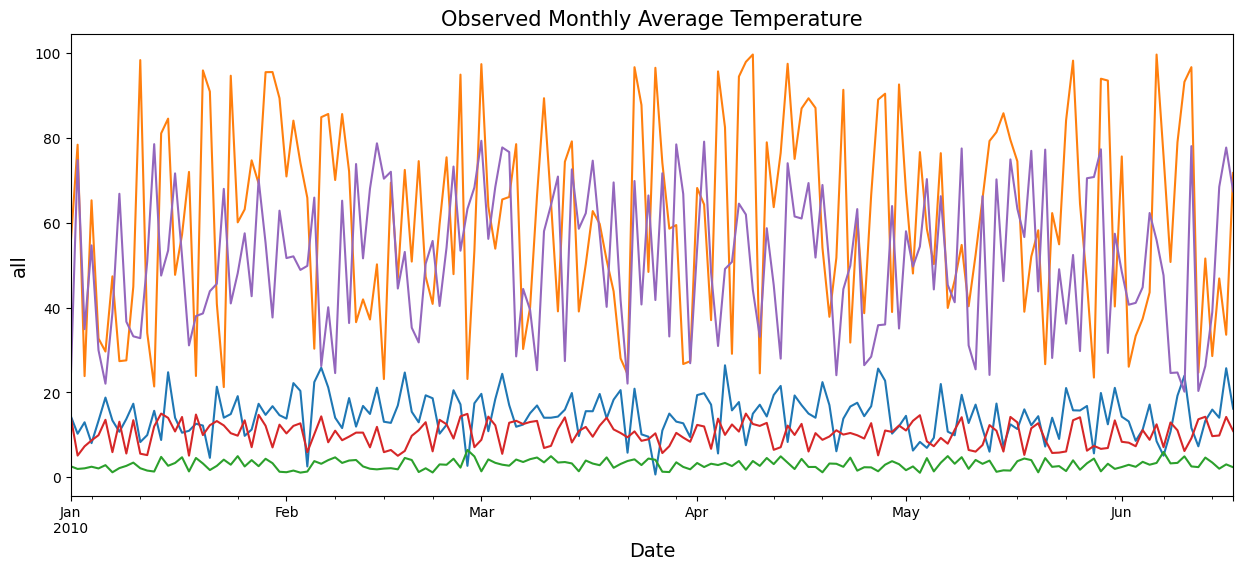

In [119]:

df.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('all', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

Temperature (°C) moving average

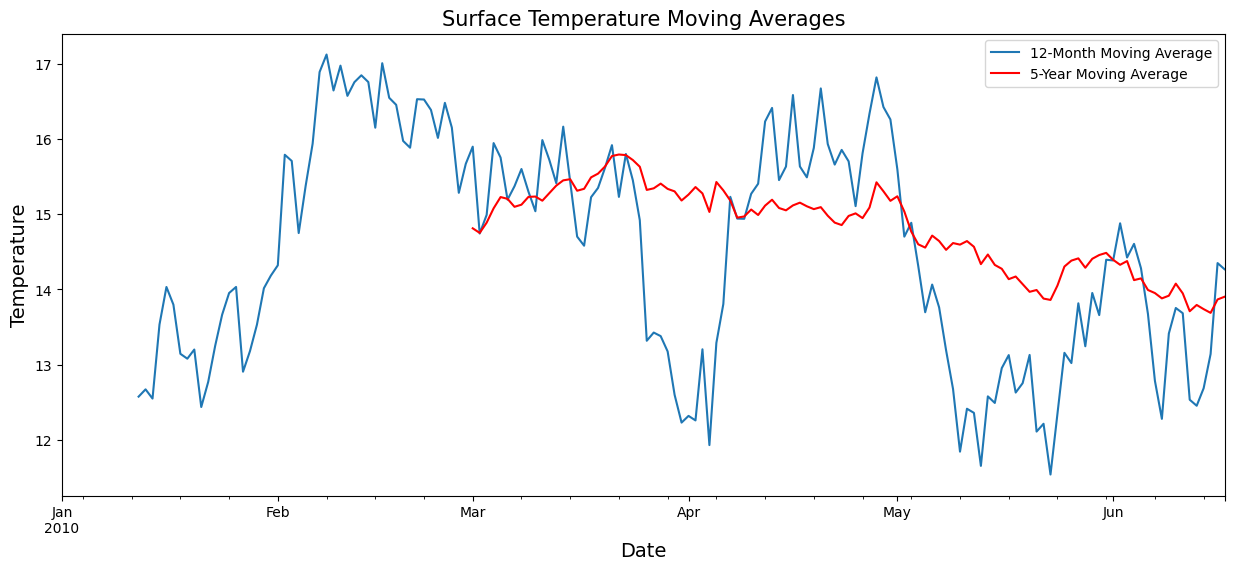

In [43]:
yearly = df['Temperature (°C)'].rolling(window = 12).mean()
fiveyearly = df['Temperature (°C)'].rolling(window = 60).mean()
MAax = yearly['2010':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['2010':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

find the trend,seasonal,residual on the Crop Yield (tons/hectare)

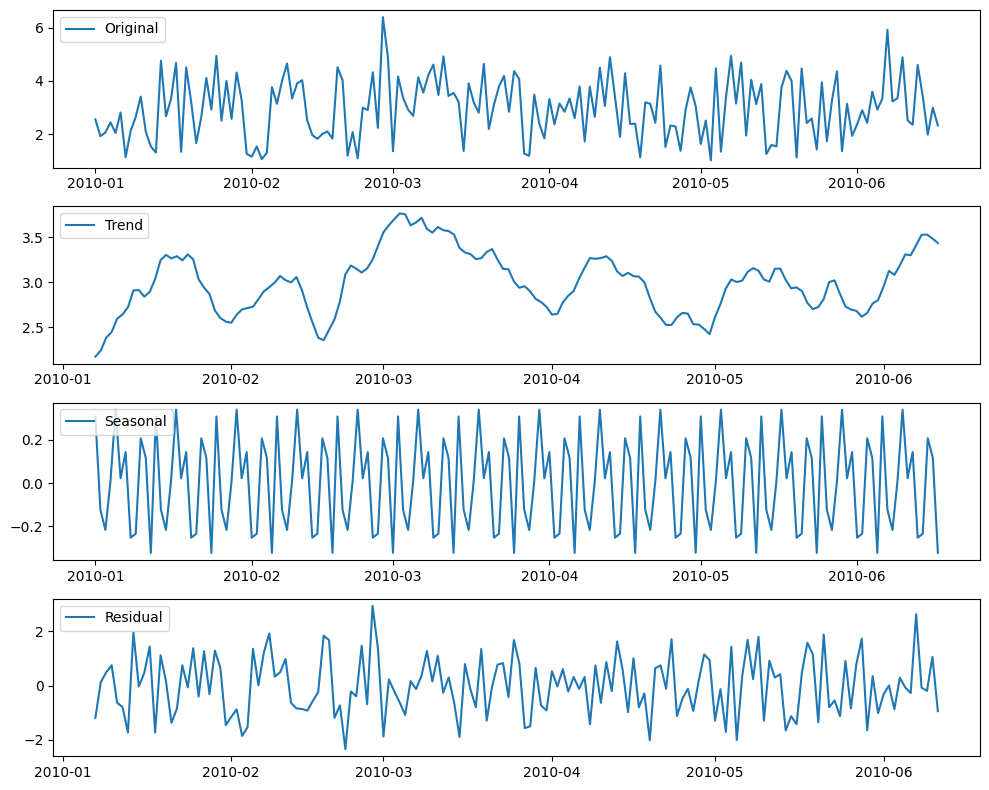

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Crop Yield (tons/hectare)'], period=12)  # Assuming a yearly seasonality

# Plot the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df.index, df['Crop Yield (tons/hectare)'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

find the trend,seasonal,residual on the Crop Yield (tons/hectare)    

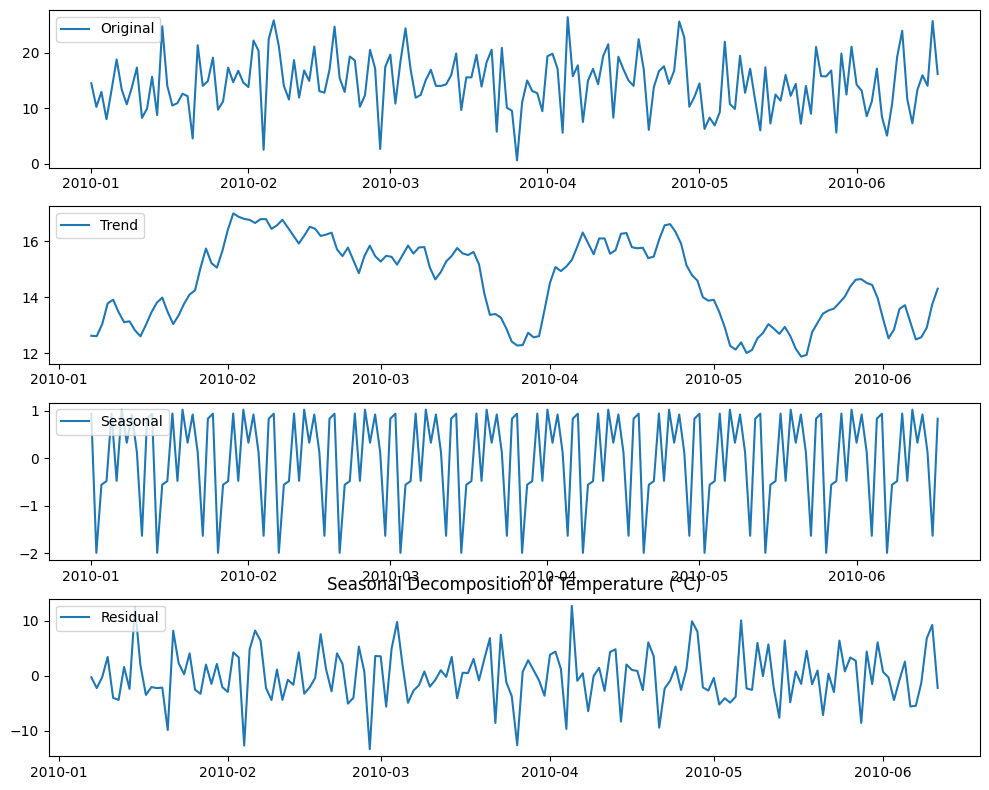

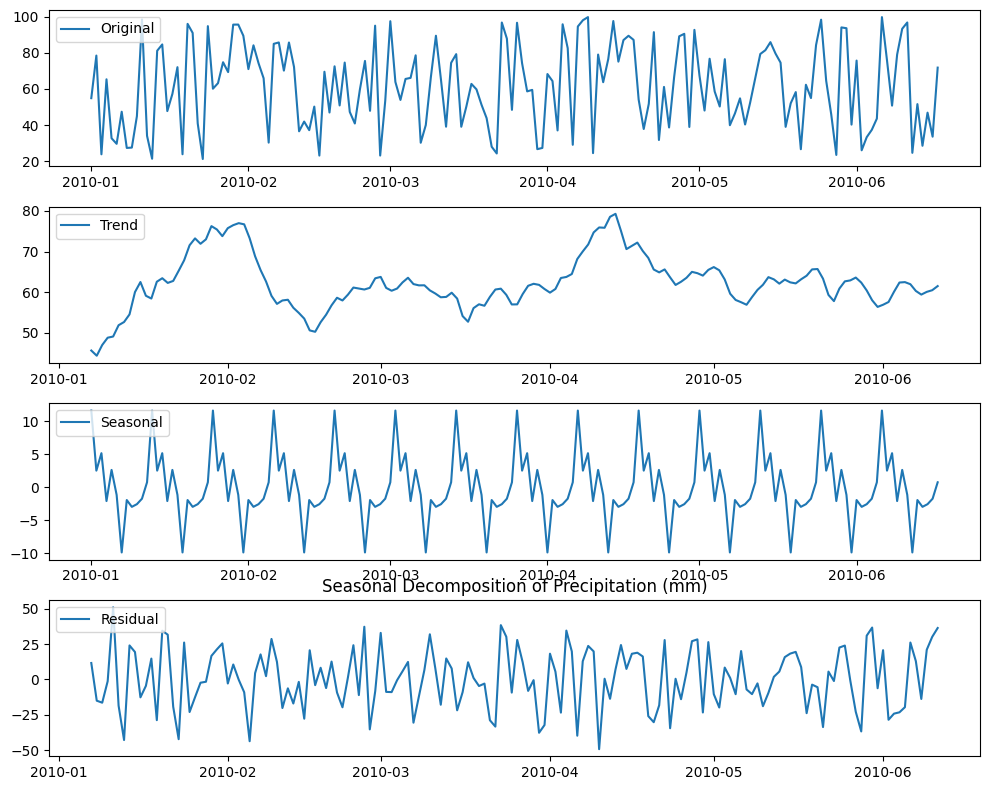

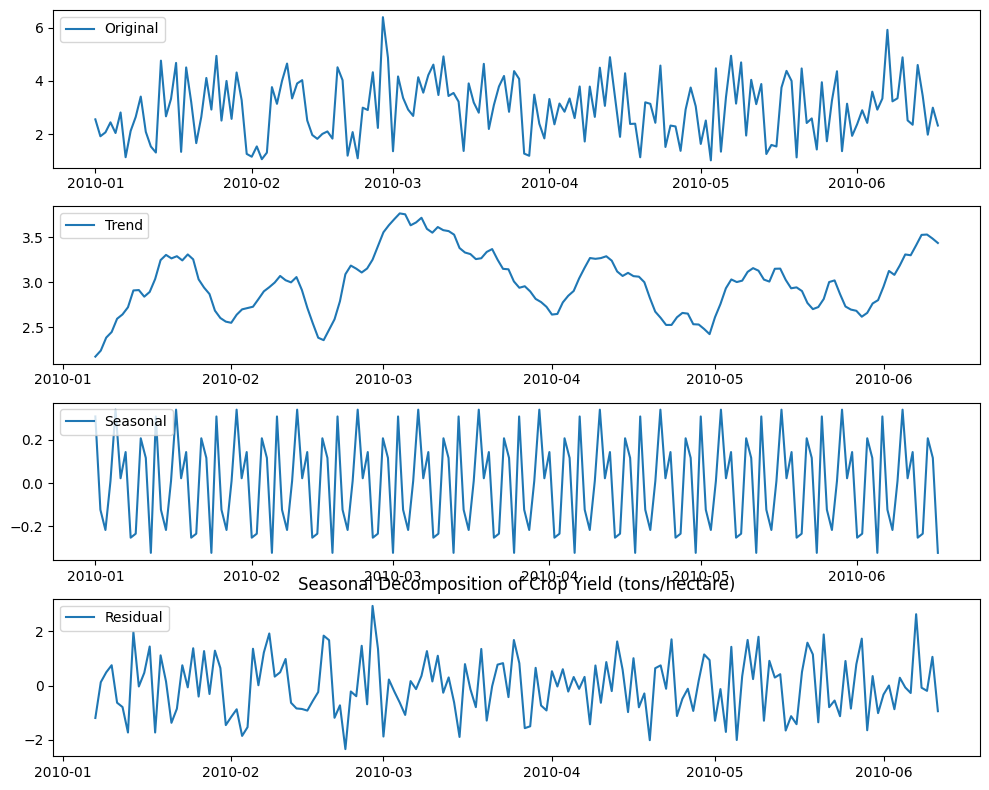

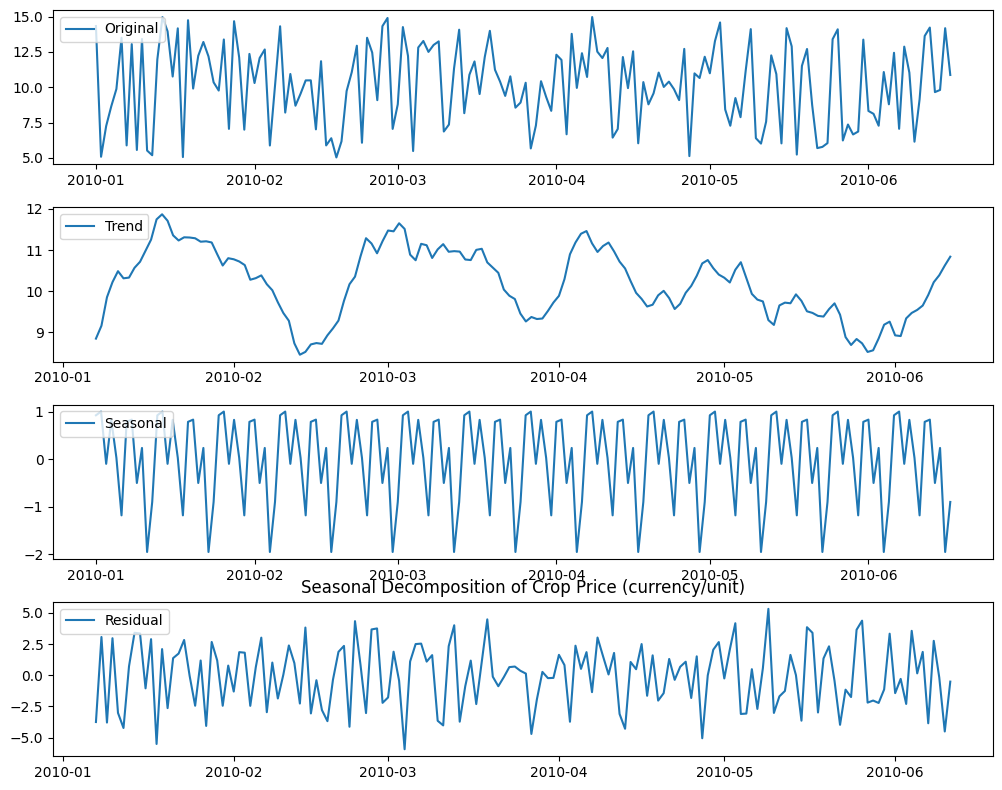

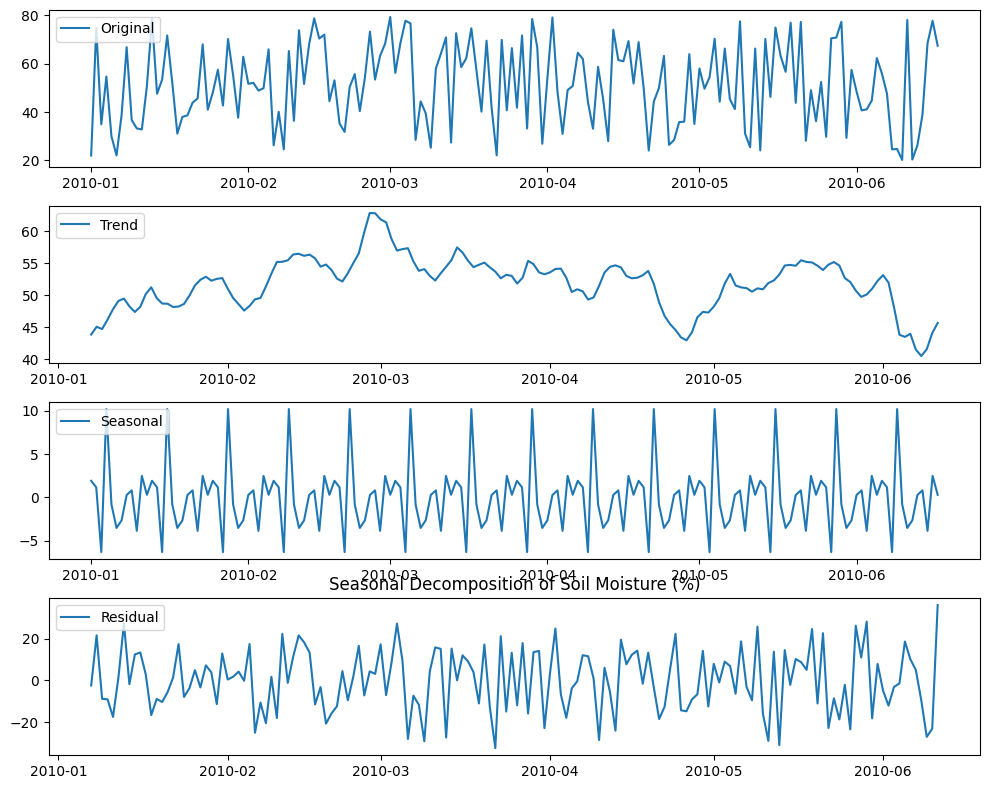

In [121]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        # Decompose the time series
        decomposition = seasonal_decompose(df[col], period=12)  # Assuming a yearly seasonality

        # Plot the decomposition
        plt.figure(figsize=(10, 8))
        plt.subplot(411)
        plt.plot(df.index, df[col], label='Original')
        plt.legend(loc='upper left')
        plt.subplot(412)
        plt.plot(df.index, decomposition.trend, label='Trend')
        plt.legend(loc='upper left')
        plt.subplot(413)
        plt.plot(df.index, decomposition.seasonal, label='Seasonal')
        plt.legend(loc='upper left')
        plt.subplot(414)
        plt.plot(df.index, decomposition.resid, label='Residual')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.title(f'Seasonal Decomposition of {col}')
        plt.show()

Checking for Stationarity of Data:
A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. We need to ensure that the time series is stationary before using it to train a model.

Augmented Dickey-Fuller (ADF) Test:
Augmented Dickey-Fuller (ADF) statistics is one of the more widely used statistical test to check whether the time series is stationary or non-stationary.
It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
Null Hypothesis: Series is not stationary.
Alternate Hypothesis: Series is stationary.

The p-value is less than the threshold of 0.05, and the ADF statistic is close to the critical values. Therefore, the time series is indeed stationary.

In [122]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(df['Crop Yield (tons/hectare)'])

Results of Dickey-Fuller Test:
Test Statistic                -6.008790e+00
p-value                        1.591769e-07
No. of Lags Used               4.000000e+00
Number of Observations Used    1.630000e+02
Critical Value (1%)           -3.471119e+00
Critical Value (5%)           -2.879441e+00
Critical Value (10%)          -2.576314e+00
dtype: float64


In [123]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags Used',
                                              'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Iterate over columns
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        print(f"ADF Test for column '{col}':")
        adf_test(df[col])
        print()

ADF Test for column 'Temperature (°C)':
Results of Dickey-Fuller Test:
Test Statistic                -1.293804e+01
p-value                        3.583260e-24
No. of Lags Used               0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64

ADF Test for column 'Precipitation (mm)':
Results of Dickey-Fuller Test:
Test Statistic                -1.157463e+01
p-value                        3.043678e-21
No. of Lags Used               0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64

ADF Test for column 'Crop Yield (tons/hectare)':
Results of Dickey-Fuller Test:
Test Statistic                -6.008790e+00
p-value                        1.591769e-07
No. of Lags Used               4.000000e

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
KPSS (Kwiatkowski-Philips-Schmidt-Shin) test is a statistical test to check for stationarity of a series around a deterministic trend. KPSS test figures out if a time series is stationary around a mean or linear trend or is non-stationary due to a unit root.

Null Hypothesis: The series is trend stationary.
Alternate Hypothesis: The series is not stationary.

In [124]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags='legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'No. of Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)

# Iterate over columns
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        print(f"KPSS Test for column '{col}':")
        kpss_test(df[col])
        print()



KPSS Test for column 'Temperature (°C)':
Results of KPSS Test:
Test Statistic            0.1516
p-value                   0.1000
No. of Lags Used         14.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

KPSS Test for column 'Precipitation (mm)':
Results of KPSS Test:
Test Statistic            0.095527
p-value                   0.100000
No. of Lags Used         14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

KPSS Test for column 'Crop Yield (tons/hectare)':
Results of KPSS Test:
Test Statistic            0.127558
p-value                   0.100000
No. of Lags Used         14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

KPSS Test for column 'Crop Pric

ARIMA

In [125]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to each column in the DataFrame
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        stepwise_fit = auto_arima(df[col], start_p=1, start_q=1,
                                  max_p=3, max_q=3, m=12,
                                  start_P=0, seasonal=True,
                                  d=None, D=1, trace=True,
                                  error_action='ignore',  # we don't want to know if an order does not work
                                  suppress_warnings=True,  # we don't want convergence warnings
                                  stepwise=True)  # set to stepwise

        # To print the summary
        print(f"Summary for column '{col}':")
        print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1057.711, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1030.642, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1055.763, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1058.861, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1018.732, Time=0.52 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1016.891, Time=0.52 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1028.807, Time=0.12 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1018.688, Time=0.47 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1020.2

In [50]:
# Import the library 
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Crop Yield (tons/hectare)'], start_p = 1, start_q = 1, 
						max_p = 3, max_q = 3, m = 12, 
						start_P = 0, seasonal = True, 
						d = None, D = 1, trace = True, 
						error_action ='ignore', # we don't want to know if an order does not work 
						suppress_warnings = True, # we don't want convergence warnings 
						stepwise = True)		 # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=600.806, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=577.617, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=599.284, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=602.667, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=554.104, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=552.230, Time=0.25 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=575.617, Time=0.08 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=554.130, Time=0.35 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=554.701, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  168
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -272.427
Date:                  Thu, 04 Apr 2024   AIC                            550.854
Time:                          23:25:37   BIC                            560.003
Sample:                      01-01-2010   HQIC                           554.570
                           - 06-17-2010                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5882      0.086     -6.805      0.000      -0.758      -0.419
ar.S.L24      -0.4304      0.085     -5.090      0.000      -0.596      -0.265
sigma2         1.8386      0.213      8.650      0.000       1.422       2.255
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.75   Prob(JB):                         0.49
Heteroskedasticity (H):               0.90   Skew:                             0.23
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Import the library 
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Crop Price (currency/unit)'], start_p = 1, start_q = 1, 
						max_p = 3, max_q = 3, m = 12, 
						start_P = 0, seasonal = True, 
						d = None, D = 1, trace = True, 
						error_action ='ignore', # we don't want to know if an order does not work 
						suppress_warnings = True, # we don't want convergence warnings 
						stepwise = True)		 # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=888.341, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=841.614, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=886.554, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=890.303, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=826.407, Time=0.48 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=824.692, Time=0.61 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=839.622, Time=0.14 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=826.403, Time=0.44 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=828.403, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  168
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -408.362
Date:                  Thu, 04 Apr 2024   AIC                            822.724
Time:                          23:28:02   BIC                            831.874
Sample:                      01-01-2010   HQIC                           826.440
                           - 06-17-2010                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7838      0.080     -9.799      0.000      -0.941      -0.627
ar.S.L24      -0.3610      0.097     -3.713      0.000      -0.552      -0.170
sigma2        10.4337      1.401      7.445      0.000       7.687      13.181
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.54   Prob(JB):                         0.33
Heteroskedasticity (H):               0.89   Skew:                            -0.04
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
# Split data into train / test sets 
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['Crop Price (currency/unit)'], 
				order = (2, 1, 0), 
				seasonal_order =(2, 1, 0, 12)) 

result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:         Crop Price (currency/unit)   No. Observations:                  156
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -391.733
Date:                            Thu, 04 Apr 2024   AIC                            793.466
Time:                                    23:42:48   BIC                            808.280
Sample:                                01-01-2010   HQIC                           799.486
                                     - 06-05-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7465      0.075     -9.899      0.000      -0.894      -0.599
ar.L2         -0.4069      0.074     -5.536      0.000      -0.551      -0.263
ar.S.L12      -0.7751      0.088     -8.843      0.000      -0.947      -0.603
ar.S.L24      -0.2783      0.100     -2.791      0.005      -0.474      -0.083
sigma2        13.2514      1.701      7.789      0.000       9.917      16.586
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.19   Prob(JB):                         0.82
Heteroskedasticity (H):               0.81   Skew:                            -0.06
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

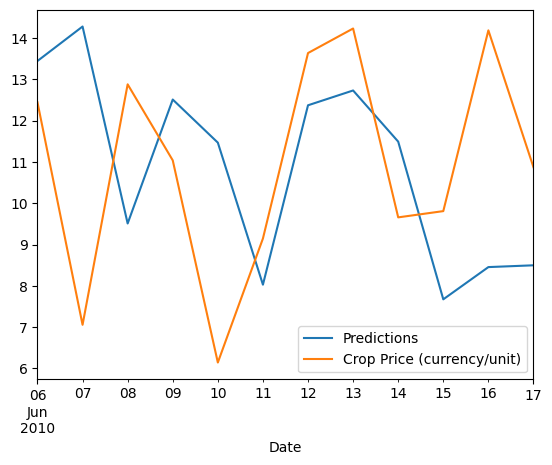

In [127]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['Crop Price (currency/unit)'].plot(legend = True) 


In [128]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
rmse(test['Crop Price (currency/unit)'], predictions) ,mean_squared_error(test['Crop Price (currency/unit)'], predictions) 

# Calculate mean squared error 
#mean_squared_error(test['Crop Price (currency/unit)'], predictions) 


(3.4942614348932426, 12.209862975382181)

SARIMAX

<Axes: xlabel='Date'>

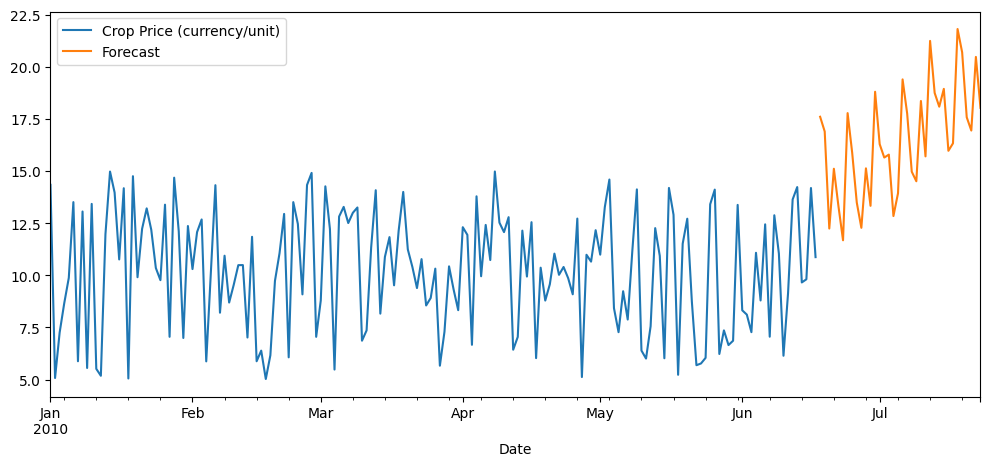

In [129]:
# Train the model on the full dataset 
model = model = SARIMAX(df['Crop Price (currency/unit)'], 
						order = (2, 1, 0), 
						seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(df), 
						end = (len(df)-1) + 3 * 12, 
						typ = 'levels').rename('Forecast') 

# Plot the forecast values 
df['Crop Price (currency/unit)'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 


LSTM

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


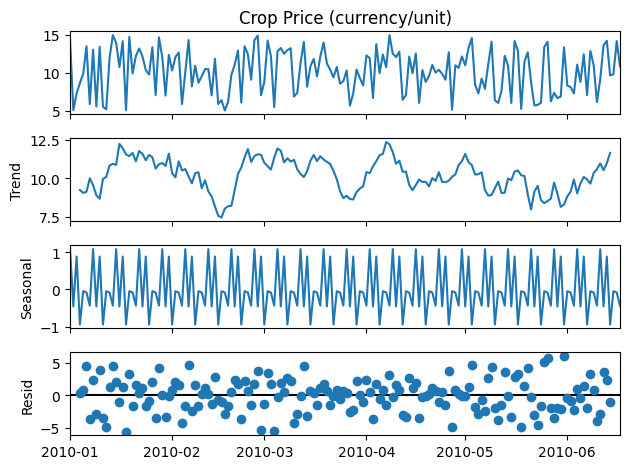

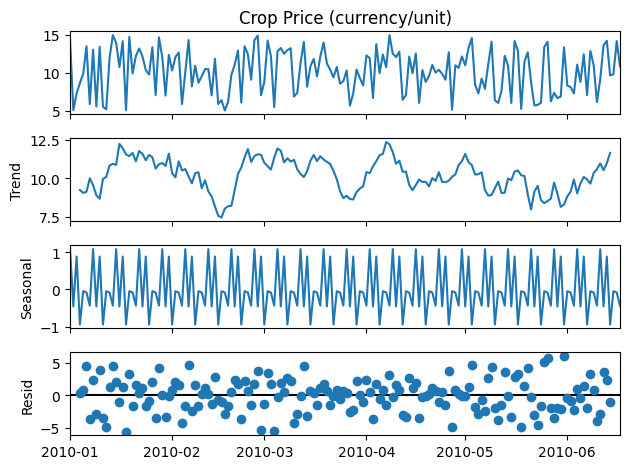

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Crop Price (currency/unit)'])
results.plot()


In [132]:
train = df.iloc[:156]
test = df.iloc[156:]

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [134]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
								scaled_train,
								length=n_input,
								batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
								scaled_train,
								length=n_input,
								batch_size=1)


Given the Array: 
[0.53838664 0.42867317 0.28632373 0.93567641 0.         0.
 0.         1.         1.         0.         0.         1.
 0.         0.37341051 0.7288551  0.16837601 0.00484779 0.92051392
 1.         0.         0.         1.         0.         0.
 1.         0.         0.47832077 0.03305191 0.19550565 0.22374471
 0.22532043 0.         0.         1.         0.         1.
 0.         1.         0.        ]
Predict this y: 
 [[0.28736132 0.56161297 0.26559349 0.36447496 0.56992936 0.
  0.         1.         1.         0.         1.         0.
  0.        ]]


In [135]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
			input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/lstm_2/while/lstm_cell/MatMul' defined at (most recent call last):
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 193, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 567, in run_forever
      self._run_once()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1855, in _run_once
      handle._run()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SAMIK\AppData\Local\Temp\ipykernel_14904\2079829174.py", line 8, in <module>
      model.fit(generator, epochs=5)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\layers\rnn\base_rnn.py", line 556, in __call__
      return super().__call__(inputs, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\layers\rnn\lstm.py", line 626, in call
      last_output, outputs, states = backend.rnn(
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py", line 5170, in rnn
      final_outputs = tf.compat.v1.while_loop(
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py", line 5149, in _step
      output, new_states = step_function(
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\layers\rnn\lstm.py", line 624, in step
      return self.cell(inputs, states, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\layers\rnn\lstm.py", line 327, in call
      z = backend.dot(inputs, self.kernel)
    File "c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py", line 2465, in dot
      out = tf.matmul(x, y)
Node: 'sequential_2/lstm_2/while/lstm_cell/MatMul'
Matrix size-incompatible: In[0]: [1,13], In[1]: [1,400]
	 [[{{node sequential_2/lstm_2/while/lstm_cell/MatMul}}]] [Op:__inference_train_function_6208]

In [77]:
df2=df.drop(['Region','Pest Infestation','Agricultural Practice'],axis=1)

In [78]:
import pandas as pd

# Assuming df2 is your DataFrame with 'Date' and 'Sales' columns

# Convert 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' column as the index of the DataFrame
df2.set_index('Date', inplace=True)

# Resample data to get average monthly sales for each year
avg_monthly_sales = df2.resample('Y').mean()

print("Average Monthly Sales for Each Year:")
print(avg_monthly_sales)


Average Monthly Sales for Each Year:
            Temperature (°C)  Precipitation (mm)  Crop Yield (tons/hectare)  \
Date                                                                          
2010-12-31         14.538486           61.489923                   2.971269   

            Crop Price (currency/unit)  Soil Moisture (%)  
Date                                                       
2010-12-31                   10.198378          51.383096  


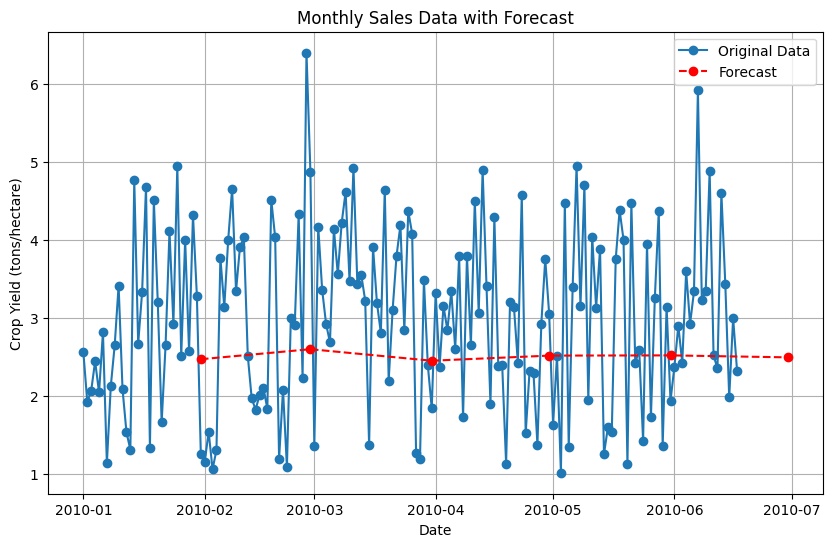

In [136]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Crop Yield (tons/hectare)'], order=(2, 1, 0))
fit_model = model.fit()

# Forecast next 6 months
forecast = fit_model.forecast(steps=6)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Crop Yield (tons/hectare)'], marker='o', linestyle='-', label='Original Data')
plt.plot(pd.date_range(start='2010-01-01', periods=6, freq='M'), forecast, marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Monthly Sales Data with Forecast')
plt.xlabel('Date')
plt.ylabel('Crop Yield (tons/hectare)')
plt.legend()
plt.grid(True)
plt.show()